# Mediciones de contaminación de Madrid en el año 2018
Leer y tratar los datos

## 1. Lectura
Lectura de los datos alojados en formato csv en el directorio

In [1]:
import pandas as pd

df = pd.read_csv("./anio201810/ene_mo18.csv", sep=";")
df

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2018,1,1,1.00,V,...,2.00,V,1.00,V,1.00,V,1.00,V,1.00,V
1,28,79,4,1,28079004_1_38,2018,1,2,1.00,V,...,1.00,V,1.00,V,1.00,V,2.00,V,2.00,V
2,28,79,4,1,28079004_1_38,2018,1,3,1.00,V,...,2.00,V,2.00,V,2.00,V,3.00,V,2.00,V
3,28,79,4,1,28079004_1_38,2018,1,4,2.00,V,...,2.00,V,1.00,V,1.00,V,1.00,V,1.00,V
4,28,79,4,1,28079004_1_38,2018,1,5,1.00,V,...,2.00,V,2.00,V,2.00,V,1.00,V,2.00,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,28,79,60,14,28079060_14_6,2018,1,27,70.91,V,...,69.95,V,65.95,V,56.54,V,61.78,V,56.38,V
4665,28,79,60,14,28079060_14_6,2018,1,28,57.41,V,...,52.82,V,48.78,V,58.42,V,55.23,V,56.92,V
4666,28,79,60,14,28079060_14_6,2018,1,29,52.52,V,...,3.75,V,3.08,V,3.85,V,3.58,V,3.18,V
4667,28,79,60,14,28079060_14_6,2018,1,30,2.90,V,...,3.26,V,3.36,V,2.82,V,4.02,V,5.69,V


## 2. Limpieza de datos
Selección de datos referentes a NO2 y limpieza de columnas

In [2]:
df_no2 = df[df["MAGNITUD"]==8]
df_no2

In [5]:
h_columns = [f"H{i:02d}" for i in range(1,25)]
final_columns = ["ESTACION","MES","DIA"]+h_columns
df_no2 = df_no2[final_columns]
df_no2

,ESTACION,MES,DIA,H01,H02,H03,H04,H05,H06,H07,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
93,4,1,1,15.0,35.0,29.0,16.0,12.0,10.0,9.0,...,15.0,10.0,14.0,25.0,32.0,39.0,35.0,27.0,23.0,11.0
94,4,1,2,13.0,17.0,6.0,3.0,1.0,2.0,10.0,...,39.0,36.0,36.0,34.0,34.0,38.0,41.0,47.0,55.0,47.0
95,4,1,3,35.0,17.0,7.0,13.0,11.0,18.0,36.0,...,43.0,36.0,37.0,37.0,49.0,53.0,47.0,51.0,56.0,41.0
96,4,1,4,35.0,34.0,11.0,11.0,14.0,7.0,8.0,...,23.0,24.0,22.0,26.0,35.0,42.0,36.0,35.0,34.0,28.0
97,4,1,5,24.0,17.0,11.0,8.0,6.0,6.0,17.0,...,34.0,31.0,32.0,42.0,51.0,53.0,54.0,52.0,46.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,60,1,27,10.0,10.0,8.0,6.0,6.0,6.0,17.0,...,10.0,8.0,9.0,12.0,18.0,15.0,20.0,23.0,17.0,19.0
4572,60,1,28,17.0,18.0,13.0,6.0,4.0,4.0,6.0,...,9.0,7.0,9.0,11.0,19.0,30.0,31.0,17.0,20.0,20.0
4573,60,1,29,24.0,14.0,11.0,17.0,12.0,17.0,26.0,...,23.0,20.0,29.0,40.0,66.0,89.0,102.0,113.0,98.0,85.0
4574,60,1,30,81.0,73.0,70.0,37.0,23.0,29.0,47.0,...,24.0,25.0,30.0,38.0,77.0,93.0,92.0,91.0,88.0,73.0


## 3. Tratamiento de datos
De cara a poder hacer un análisis mejor de los datos facilitados es mejor tener dispuestos los valores de las columnas H01...H24 en una sola columna

In [6]:
df_unpivoted = df_no2.melt(id_vars=["ESTACION","MES","DIA"], var_name='HORA', value_name='valor')
df_unpivoted


,ESTACION,MES,DIA,HORA,valor
0,4,1,1,H01,15.0
1,4,1,2,H01,13.0
2,4,1,3,H01,35.0
3,4,1,4,H01,35.0
4,4,1,5,H01,24.0
...,...,...,...,...,...
17851,60,1,27,H24,19.0
17852,60,1,28,H24,20.0
17853,60,1,29,H24,85.0
17854,60,1,30,H24,73.0


In [27]:
estacion4 = df_unpivoted[(df_unpivoted["ESTACION"]==4) & (df_unpivoted["DIA"]==1)]
estacion4.head()


,ESTACION,MES,DIA,HORA,valor
0,4,1,1,H01,15.0
744,4,1,1,H02,35.0
1488,4,1,1,H03,29.0
2232,4,1,1,H04,16.0
2976,4,1,1,H05,12.0


In [19]:
estacion4["valor"].describe()

count    24.000000
mean     21.375000
std       9.187953
min       9.000000
25%      14.750000
50%      19.500000
75%      27.500000
max      39.000000
Name: valor, dtype: float64

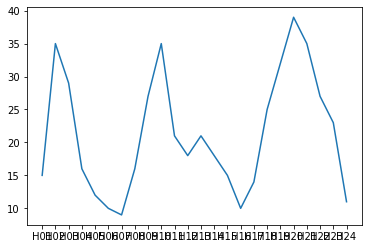

In [24]:
import matplotlib.pyplot as plt

estacion4["valor"].plot()
plt.show()
